In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import copy

In [30]:
df_tconsol = pd.read_csv("NCAA_Team_Data.csv")
df_tconsol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 48 columns):
Unnamed: 0    612 non-null int64
Rk            612 non-null int64
School        612 non-null object
G             612 non-null int64
W             612 non-null int64
L             612 non-null int64
W-L%          612 non-null float64
SRS           612 non-null float64
SOS           612 non-null float64
W_conf        612 non-null int64
L_conf        612 non-null int64
W_home        612 non-null int64
L_home        612 non-null int64
W_away        612 non-null int64
L_away        612 non-null int64
Tm.           612 non-null int64
Opp.          612 non-null int64
MP            612 non-null int64
FG            612 non-null int64
FGA           612 non-null int64
FG%           612 non-null float64
3P            612 non-null int64
3PA           612 non-null int64
3P%           612 non-null float64
FT            612 non-null int64
FTA           612 non-null int64
FT%           612 non-null

In [31]:
df_tconsol.head()

,Unnamed: 0,Rk,School,G,W,L,W-L%,SRS,SOS,W_conf,...,TS%,TRB%,AST%,STL%,BLK%,eFG%,TOV%,ORB%,FT/FGA,Year
0,1,2,Akron NCAA,36,23,13,0.639,2.15,-1.02,9,...,0.530,47.9,58.3,9.8,9.2,0.499,15.4,28.3,0.220,2011
1,3,4,Alabama-Birmingham NCAA,31,22,9,0.710,8.55,2.78,12,...,0.538,51.7,55.6,8.2,8.2,0.508,16.4,33.4,0.213,2011
2,4,5,Alabama State NCAA,35,17,18,0.486,-13.37,-10.31,11,...,0.476,50.7,55.5,10.9,13.1,0.440,19.6,35.7,0.285,2011
3,11,12,Arizona NCAA,38,30,8,0.789,16.54,7.99,14,...,0.583,53.1,55.3,7.7,6.5,0.541,16.3,34.0,0.325,2011
4,12,13,Little Rock NCAA,36,19,17,0.528,-4.32,-2.97,7,...,0.528,48.9,52.5,8.9,7.4,0.488,15.5,29.9,0.292,2011


In [32]:
df_tconsol.describe()

,Unnamed: 0,Rk,G,W,L,W-L%,SRS,SOS,W_conf,L_conf,...,TS%,TRB%,AST%,STL%,BLK%,eFG%,TOV%,ORB%,FT/FGA,Year
count,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,...,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000,612.000000
mean,202.310458,185.787582,34.921569,25.040850,9.880719,0.715368,11.554183,4.292843,12.341503,5.153595,...,0.554554,51.579575,54.519608,9.734150,10.604412,0.520212,15.264052,32.306863,0.265593,2015.000000
std,111.521900,101.382751,1.834492,4.068557,3.275234,0.096686,8.076439,5.625766,2.471317,2.496991,...,0.024990,2.525353,5.060496,1.759173,2.794880,0.027274,1.618939,4.172930,0.037649,2.584101
min,0.000000,1.000000,30.000000,14.000000,1.000000,0.412000,-13.370000,-12.310000,5.000000,0.000000,...,0.476000,44.300000,37.900000,5.500000,3.800000,0.440000,10.700000,17.600000,0.177000,2011.000000
25%,115.000000,106.000000,34.000000,22.000000,8.000000,0.639000,6.577500,-0.662500,10.750000,3.000000,...,0.536000,49.900000,51.100000,8.600000,8.600000,0.500000,14.100000,29.475000,0.240750,2013.000000
50%,201.000000,184.000000,35.000000,25.000000,10.000000,0.716500,13.145000,6.130000,12.000000,5.000000,...,0.554000,51.700000,54.200000,9.600000,10.400000,0.520000,15.200000,32.400000,0.266000,2015.000000
75%,298.250000,273.250000,36.000000,27.250000,12.000000,0.784000,17.247500,8.740000,14.000000,7.000000,...,0.573000,53.200000,57.700000,10.800000,12.500000,0.538000,16.300000,35.100000,0.290000,2017.000000
max,385.000000,352.000000,41.000000,38.000000,21.000000,0.974000,28.720000,12.790000,19.000000,13.000000,...,0.623000,58.600000,71.300000,17.000000,20.400000,0.598000,20.700000,45.400000,0.369000,2019.000000


In [33]:
#creating netrating
df_tconsol["NRtg"] = ((df_tconsol["Tm."] - df_tconsol["Opp."])/df_tconsol["G"]).round(2)
df_tconsol.head()

,Unnamed: 0,Rk,School,G,W,L,W-L%,SRS,SOS,W_conf,...,TRB%,AST%,STL%,BLK%,eFG%,TOV%,ORB%,FT/FGA,Year,NRtg
0,1,2,Akron NCAA,36,23,13,0.639,2.15,-1.02,9,...,47.9,58.3,9.8,9.2,0.499,15.4,28.3,0.220,2011,4.42
1,3,4,Alabama-Birmingham NCAA,31,22,9,0.710,8.55,2.78,12,...,51.7,55.6,8.2,8.2,0.508,16.4,33.4,0.213,2011,5.77
2,4,5,Alabama State NCAA,35,17,18,0.486,-13.37,-10.31,11,...,50.7,55.5,10.9,13.1,0.440,19.6,35.7,0.285,2011,-2.51
3,11,12,Arizona NCAA,38,30,8,0.789,16.54,7.99,14,...,53.1,55.3,7.7,6.5,0.541,16.3,34.0,0.325,2011,8.55
4,12,13,Little Rock NCAA,36,19,17,0.528,-4.32,-2.97,7,...,48.9,52.5,8.9,7.4,0.488,15.5,29.9,0.292,2011,0.86


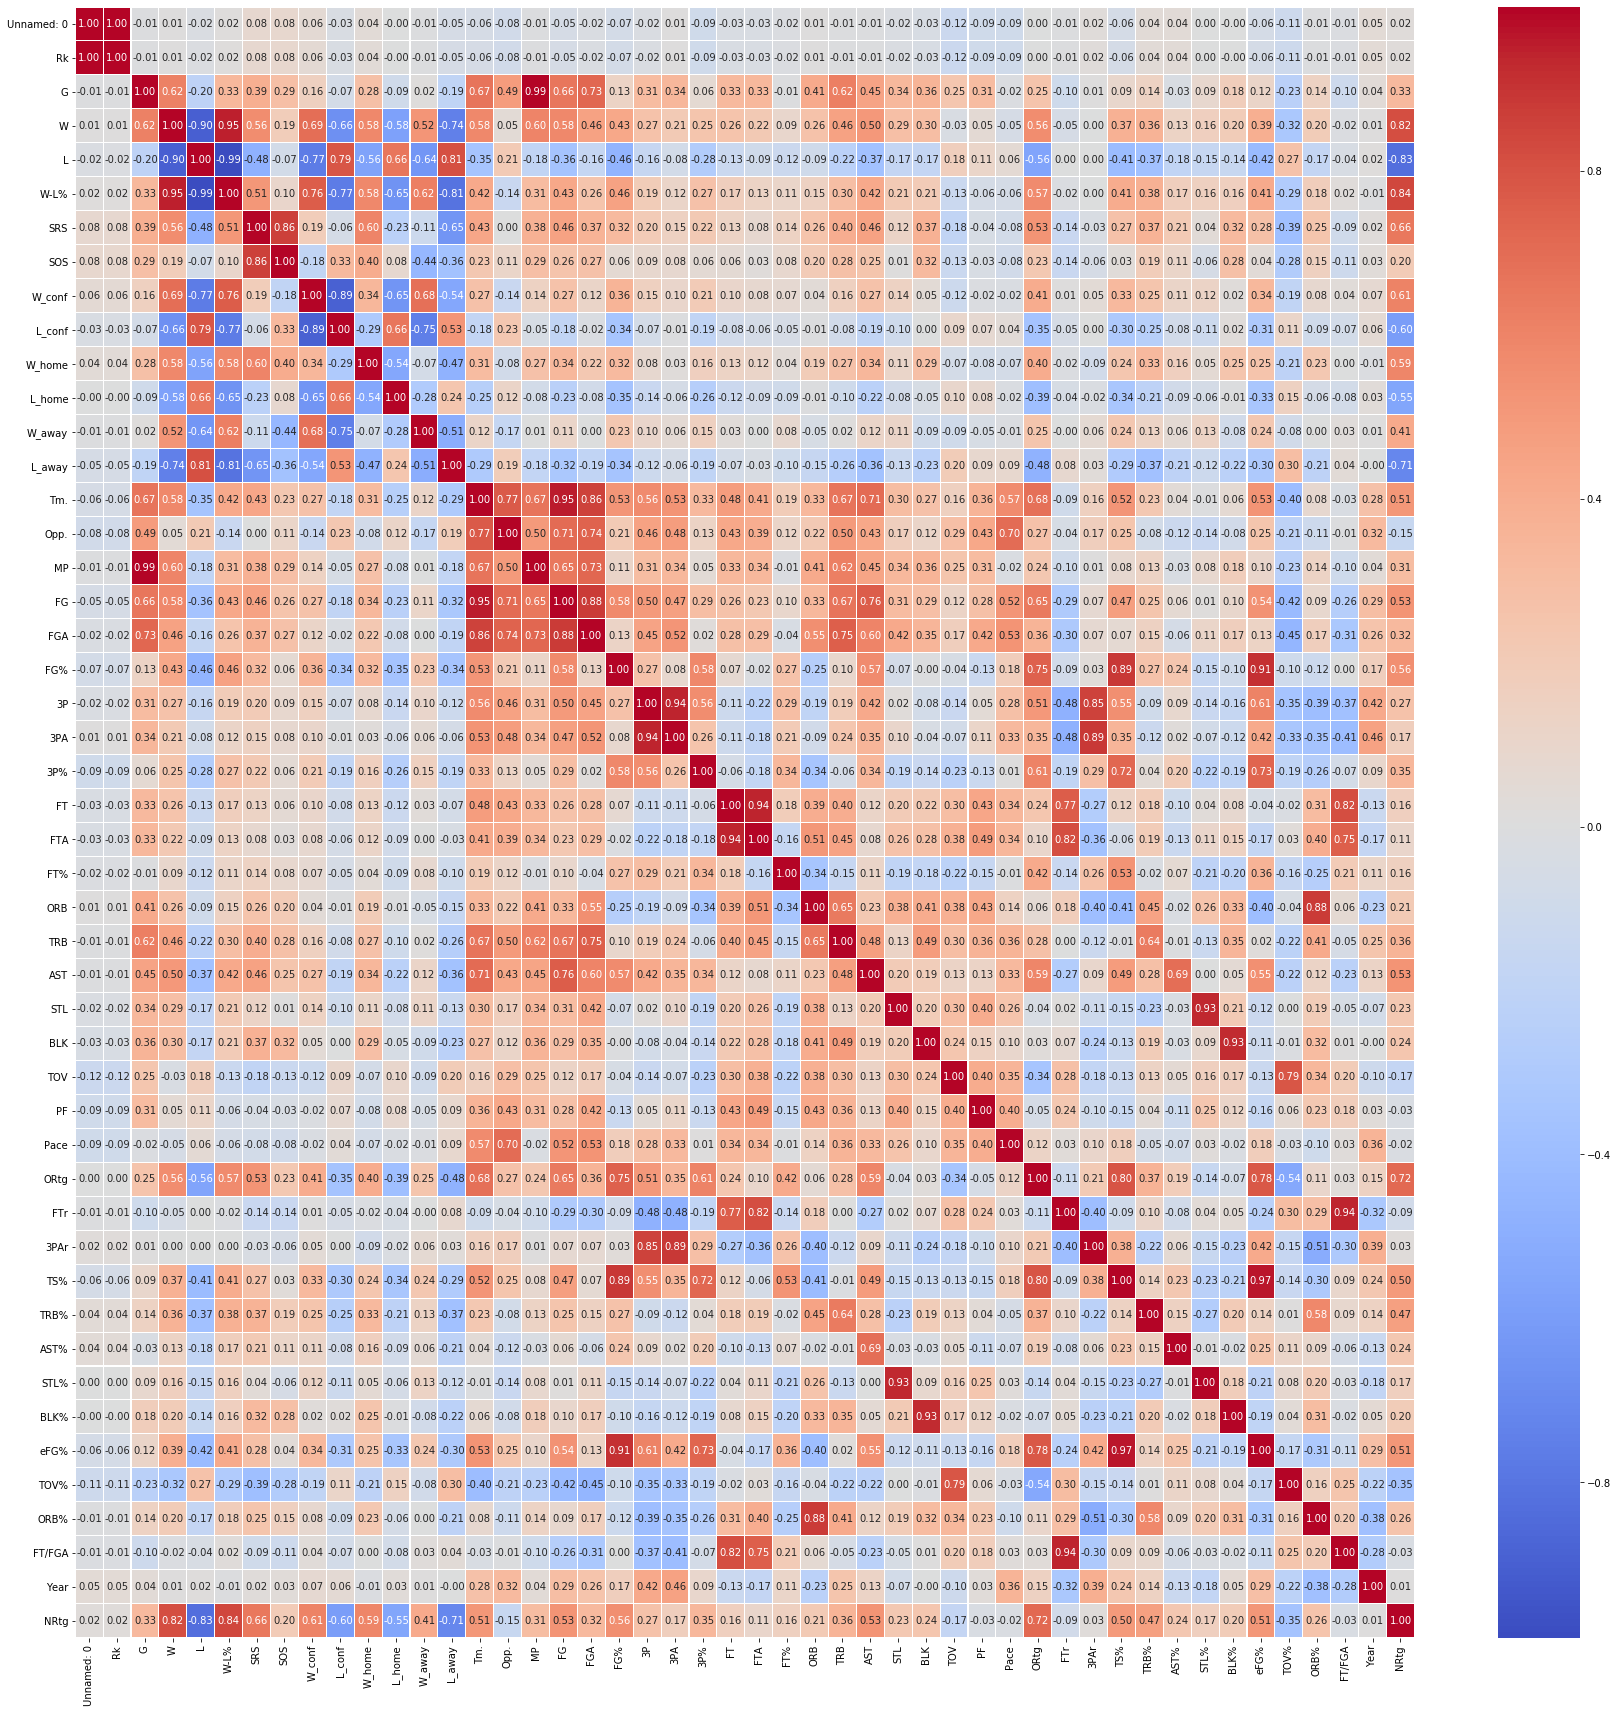

In [34]:
fig, ax = plt.subplots(figsize = (30,30))
sns.heatmap(df_tconsol.corr(), ax =ax, annot = True, linewidths=0.05,fmt='.2f',cmap="coolwarm")

In [58]:
df_tconsol.corrwith(df_tconsol["W_conf"]).sort_values(ascending=False)[:15]

W_conf    1.000000
W-L%      0.762726
W         0.689756
W_away    0.683385
NRtg      0.609338
ORtg      0.409241
FG%       0.355523
W_home    0.340175
eFG%      0.336878
TS%       0.329624
Tm.       0.269959
AST       0.268297
FG        0.267311
TRB%      0.249702
3P%       0.205607
dtype: float64

# Player Aggregation

In [36]:
df = pd.read_csv("ALL_PLAYER_DATA.csv")

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7904 entries, 0 to 7903
Data columns (total 47 columns):
Unnamed: 0    7904 non-null int64
Player        7904 non-null object
G             7904 non-null int64
GS            7904 non-null int64
MPG           7904 non-null float64
FG            7904 non-null float64
FGA           7904 non-null float64
FG%           7371 non-null float64
2P            7904 non-null float64
2PA           7904 non-null float64
2P%           7068 non-null float64
3P            7904 non-null float64
3PA           7904 non-null float64
3P%           5763 non-null float64
FT            7904 non-null float64
FTA           7904 non-null float64
FT%           6495 non-null float64
ORB           7904 non-null float64
DRB           7904 non-null float64
TRB           7904 non-null float64
AST           7904 non-null float64
STL           7904 non-null float64
BLK           7904 non-null float64
TOV           7904 non-null float64
PF            7904 non-null float64


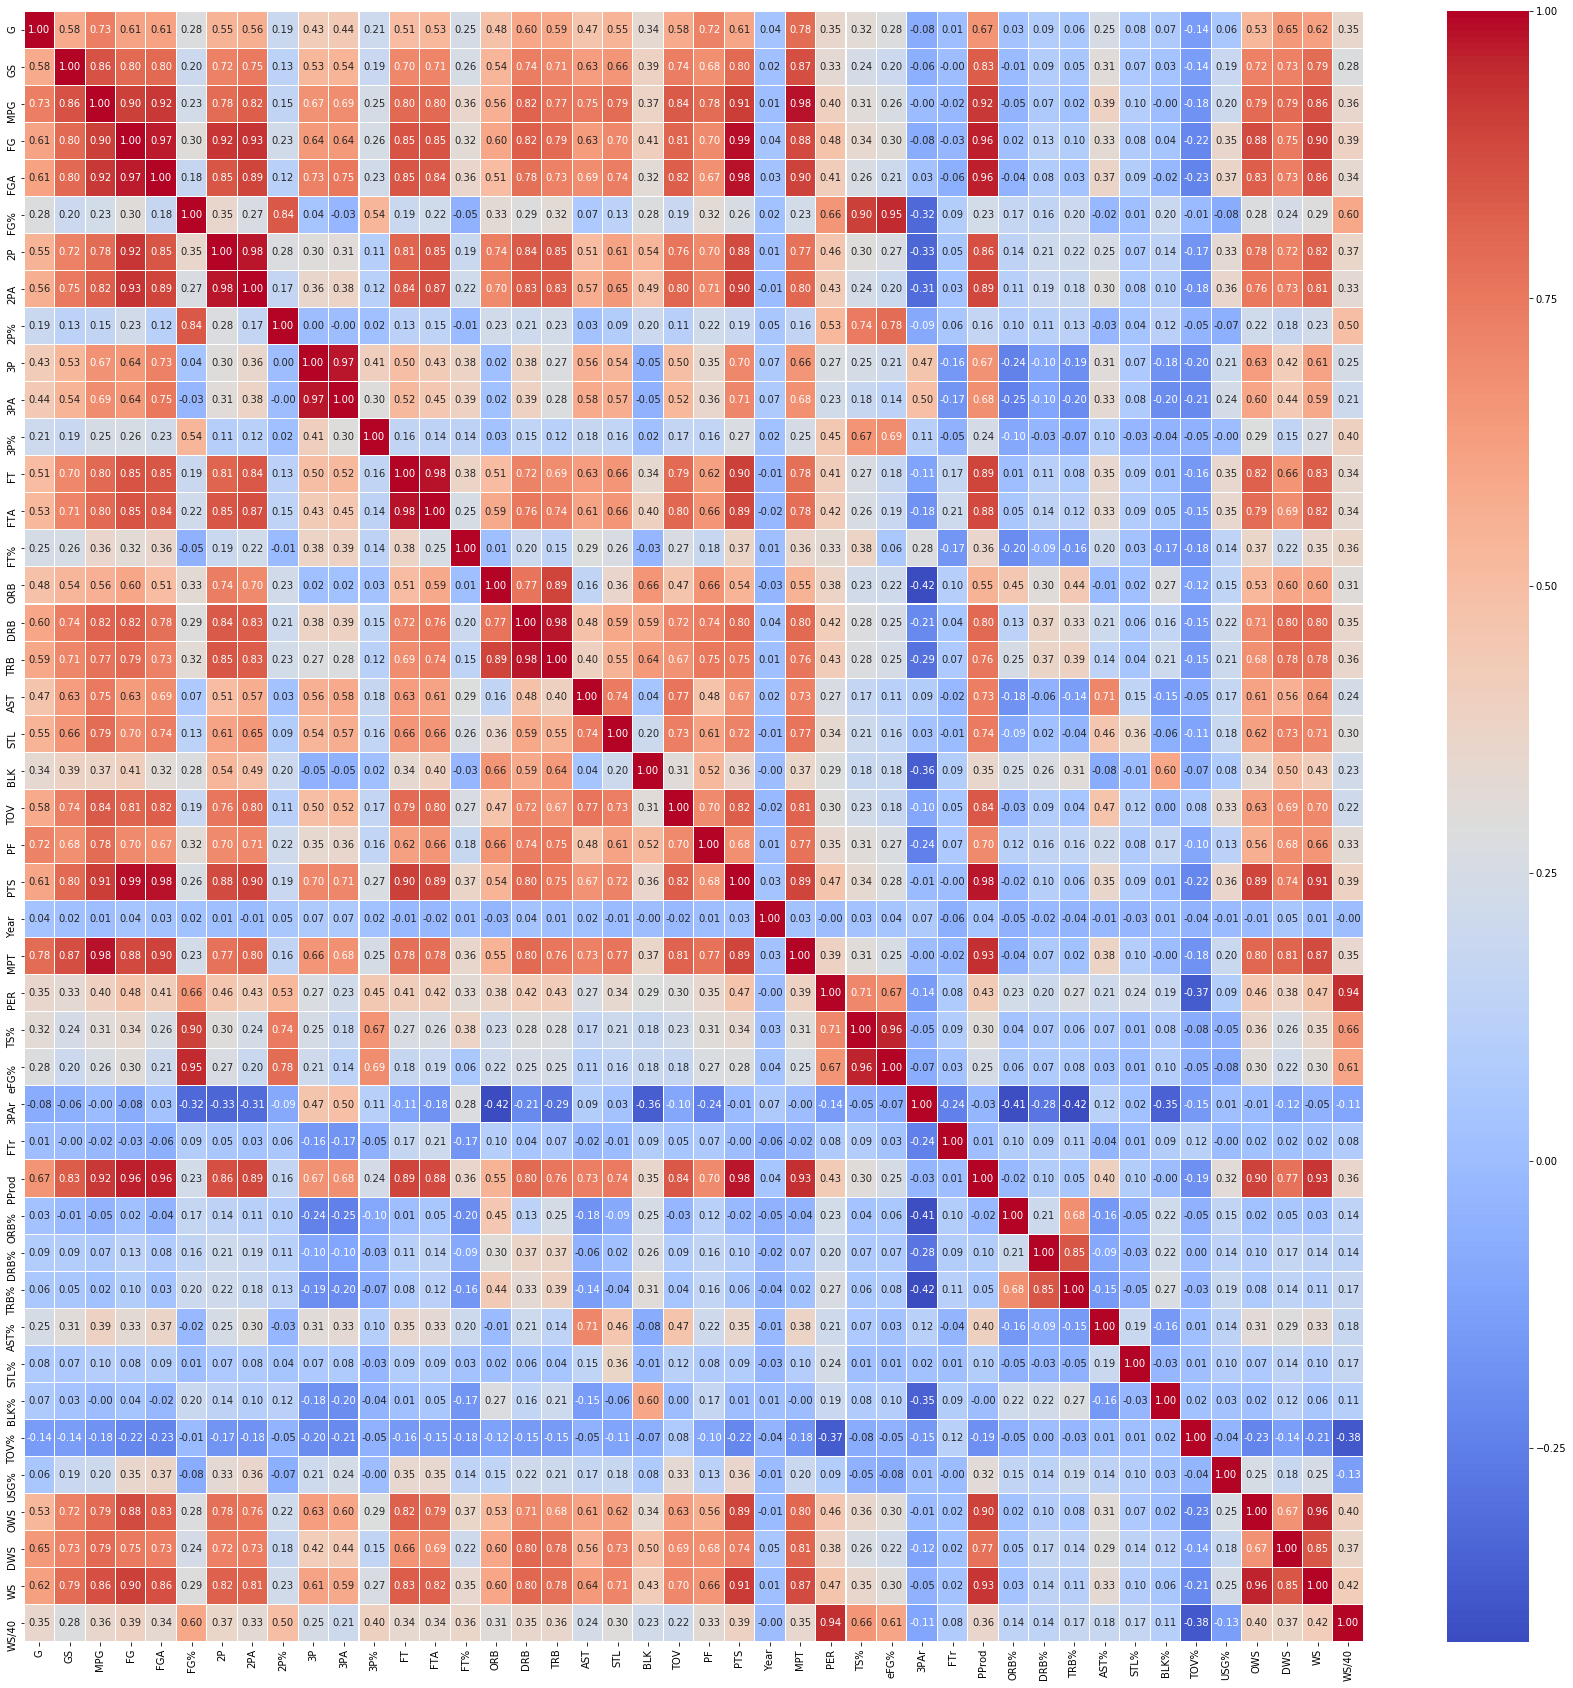

In [38]:
df_temp = df.iloc[:,2:]
fig, ax = plt.subplots(figsize = (30,30))
sns.heatmap(df_temp.corr(), ax =ax, annot = True, linewidths=0.05,fmt='.2f',cmap="coolwarm")

In [57]:
df.corrwith(df["WS/40"]).sort_values(ascending=False)[:15]

WS/40    1.000000
PER      0.939391
TS%      0.657130
eFG%     0.606318
FG%      0.595073
2P%      0.500484
WS       0.419038
3P%      0.398296
OWS      0.396647
FG       0.393568
PTS      0.389774
DWS      0.366643
2P       0.365713
FT%      0.363089
PProd    0.362535
dtype: float64

In [40]:
columns = ["Year","School","PER","WS","WS/40","PProd","FT","TS%","PTS"]
cols = ["PER","WS","WS/40","PProd","FT","TS%","PTS"]
rows = []
for year in range(2011,2020):
    df_year = df[df["Year"] == year]
#     print(df_year.shape)
    for school in set(df_year["School"].values):
#         print(team)
        df_team = df_year[df_year["School"] == school]
#         print(df_team)
        df_team = df_team.sort_values(["WS"],ascending=False)
        df_imp = df_team[cols]
#         print(df_imp)
        row = []
        row.append(year)
        row.append(school)
#         print(row)
        for col in cols:
            row.append(df_imp[col].sum().round(2))
#         print(row)
        rows.append(row)

In [41]:
df_agg = pd.DataFrame(rows, columns=columns)

In [42]:
df_agg = df_agg.rename(columns={"PER" : "sum_PER", "WS" : "sum_WS", "WS/40" : "sum_WS/40", "PProd" : "sum_PProd", "FT" : "sum_FT", "TS%" : "sum_TS%", "PTS" : "sum_PTS"})
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 9 columns):
Year         612 non-null int64
School       612 non-null object
sum_PER      612 non-null float64
sum_WS       612 non-null float64
sum_WS/40    612 non-null float64
sum_PProd    612 non-null float64
sum_FT       612 non-null float64
sum_TS%      612 non-null float64
sum_PTS      612 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 43.2+ KB


In [43]:
# df_agg.to_csv("Player_Aggregation.csv")
df_agg.head()

,Year,School,sum_PER,sum_WS,sum_WS/40,sum_PProd,sum_FT,sum_TS%,sum_PTS
0,2011,Indiana State Sycamores,171.8,10.6,1.29,1221.0,16.9,6.82,75.4
1,2011,Akron Zips,149.4,9.6,1.02,1103.0,12.5,5.88,70.5
2,2011,Old Dominion Monarchs,136.0,12.9,1.14,1129.0,12.6,4.25,63.0
3,2011,Syracuse Orange,302.7,11.6,2.38,1277.0,14.0,7.63,77.9
4,2011,USC Trojans,43.1,10.1,0.02,1174.0,12.7,3.87,66.7


# Merge with Team Data

In [44]:
df_agg.head()

,Year,School,sum_PER,sum_WS,sum_WS/40,sum_PProd,sum_FT,sum_TS%,sum_PTS
0,2011,Indiana State Sycamores,171.8,10.6,1.29,1221.0,16.9,6.82,75.4
1,2011,Akron Zips,149.4,9.6,1.02,1103.0,12.5,5.88,70.5
2,2011,Old Dominion Monarchs,136.0,12.9,1.14,1129.0,12.6,4.25,63.0
3,2011,Syracuse Orange,302.7,11.6,2.38,1277.0,14.0,7.63,77.9
4,2011,USC Trojans,43.1,10.1,0.02,1174.0,12.7,3.87,66.7


In [45]:
df_tconsol["School"] = df_tconsol["School"].apply(lambda x: x.split("NCAA")[0].rstrip())
df_tconsol.head()

,Unnamed: 0,Rk,School,G,W,L,W-L%,SRS,SOS,W_conf,...,TRB%,AST%,STL%,BLK%,eFG%,TOV%,ORB%,FT/FGA,Year,NRtg
0,1,2,Akron,36,23,13,0.639,2.15,-1.02,9,...,47.9,58.3,9.8,9.2,0.499,15.4,28.3,0.220,2011,4.42
1,3,4,Alabama-Birmingham,31,22,9,0.710,8.55,2.78,12,...,51.7,55.6,8.2,8.2,0.508,16.4,33.4,0.213,2011,5.77
2,4,5,Alabama State,35,17,18,0.486,-13.37,-10.31,11,...,50.7,55.5,10.9,13.1,0.440,19.6,35.7,0.285,2011,-2.51
3,11,12,Arizona,38,30,8,0.789,16.54,7.99,14,...,53.1,55.3,7.7,6.5,0.541,16.3,34.0,0.325,2011,8.55
4,12,13,Little Rock,36,19,17,0.528,-4.32,-2.97,7,...,48.9,52.5,8.9,7.4,0.488,15.5,29.9,0.292,2011,0.86


In [46]:
df_rename = pd.read_csv("Rename_Dict_Edited.csv")
df_rename = df_rename.drop("Unnamed: 0", axis=1)
df_rename

,Name1,Name2
0,Abilene Christian Wildcats,Abilene Christian
1,Akron Zips,Akron
2,Alabama Crimson Tide,Alabama
3,Alabama State Hornets,Alabama State
4,Alabama-Birmingham Blazers,Alabama-Birmingham
...,...,...
205,Wofford Terriers,Wofford
206,Wright State Raiders,Wright State
207,Wyoming Cowboys,Wyoming
208,Xavier Musketeers,Xavier


In [47]:
rename_dict = dict(zip(df_rename["Name1"], df_rename["Name2"]))
rename_dict

{'Abilene Christian Wildcats': 'Abilene Christian',
 'Akron Zips': 'Akron',
 'Alabama Crimson Tide': 'Alabama',
 'Alabama State Hornets': 'Alabama State',
 'Alabama-Birmingham Blazers': 'Alabama-Birmingham',
 'Albany (NY) Great Danes': 'Albany (NY)',
 'American Eagles': 'American',
 'Arizona State Sun Devils': 'Arizona State',
 'Arizona Wildcats': 'Arizona',
 'Arkansas Razorbacks': 'Arkansas',
 'Auburn Tigers': 'Auburn',
 'Austin Peay Governors': 'Austin Peay',
 'BYU Cougars': 'Brigham Young',
 'Baylor Bears': 'Baylor',
 'Belmont Bruins': 'Belmont',
 'Boise State Broncos': 'Boise State',
 'Boston University Terriers': 'Boston University',
 'Bradley Braves': 'Bradley',
 'Bucknell Bison': 'Bucknell',
 'Buffalo Bulls': 'Buffalo',
 'Butler Bulldogs': 'Butler',
 'Cal Poly Mustangs': 'Cal Poly',
 'Cal State Bakersfield Roadrunners': 'Cal State Bakersfield',
 'Cal State Fullerton Titans': 'Cal State Fullerton',
 'California Golden Bears': 'University of California',
 'Chattanooga Mocs': 'Chat

In [48]:
for school in set(df_agg["School"].values):
    try:
        df_agg["School"] = df_agg["School"].replace(school, rename_dict[school])
    except:
        print("Already Changed: ", school)
df_agg.head()

,Year,School,sum_PER,sum_WS,sum_WS/40,sum_PProd,sum_FT,sum_TS%,sum_PTS
0,2011,Indiana State,171.8,10.6,1.29,1221.0,16.9,6.82,75.4
1,2011,Akron,149.4,9.6,1.02,1103.0,12.5,5.88,70.5
2,2011,Old Dominion,136.0,12.9,1.14,1129.0,12.6,4.25,63.0
3,2011,Syracuse,302.7,11.6,2.38,1277.0,14.0,7.63,77.9
4,2011,Southern California,43.1,10.1,0.02,1174.0,12.7,3.87,66.7


In [49]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 9 columns):
Year         612 non-null int64
School       612 non-null object
sum_PER      612 non-null float64
sum_WS       612 non-null float64
sum_WS/40    612 non-null float64
sum_PProd    612 non-null float64
sum_FT       612 non-null float64
sum_TS%      612 non-null float64
sum_PTS      612 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 43.2+ KB


In [54]:
df_tconsol = df_tconsol.drop("Unnamed: 0", axis=1)
df_tconsol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 48 columns):
Rk        612 non-null int64
School    612 non-null object
G         612 non-null int64
W         612 non-null int64
L         612 non-null int64
W-L%      612 non-null float64
SRS       612 non-null float64
SOS       612 non-null float64
W_conf    612 non-null int64
L_conf    612 non-null int64
W_home    612 non-null int64
L_home    612 non-null int64
W_away    612 non-null int64
L_away    612 non-null int64
Tm.       612 non-null int64
Opp.      612 non-null int64
MP        612 non-null int64
FG        612 non-null int64
FGA       612 non-null int64
FG%       612 non-null float64
3P        612 non-null int64
3PA       612 non-null int64
3P%       612 non-null float64
FT        612 non-null int64
FTA       612 non-null int64
FT%       612 non-null float64
ORB       612 non-null int64
TRB       612 non-null int64
AST       612 non-null int64
STL       612 non-null int64
BLK       61

In [55]:
df_add = pd.merge(df_tconsol, df_agg, on=["School","Year"])
df_add.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 611 entries, 0 to 610
Data columns (total 55 columns):
Rk           611 non-null int64
School       611 non-null object
G            611 non-null int64
W            611 non-null int64
L            611 non-null int64
W-L%         611 non-null float64
SRS          611 non-null float64
SOS          611 non-null float64
W_conf       611 non-null int64
L_conf       611 non-null int64
W_home       611 non-null int64
L_home       611 non-null int64
W_away       611 non-null int64
L_away       611 non-null int64
Tm.          611 non-null int64
Opp.         611 non-null int64
MP           611 non-null int64
FG           611 non-null int64
FGA          611 non-null int64
FG%          611 non-null float64
3P           611 non-null int64
3PA          611 non-null int64
3P%          611 non-null float64
FT           611 non-null int64
FTA          611 non-null int64
FT%          611 non-null float64
ORB          611 non-null int64
TRB          611 n

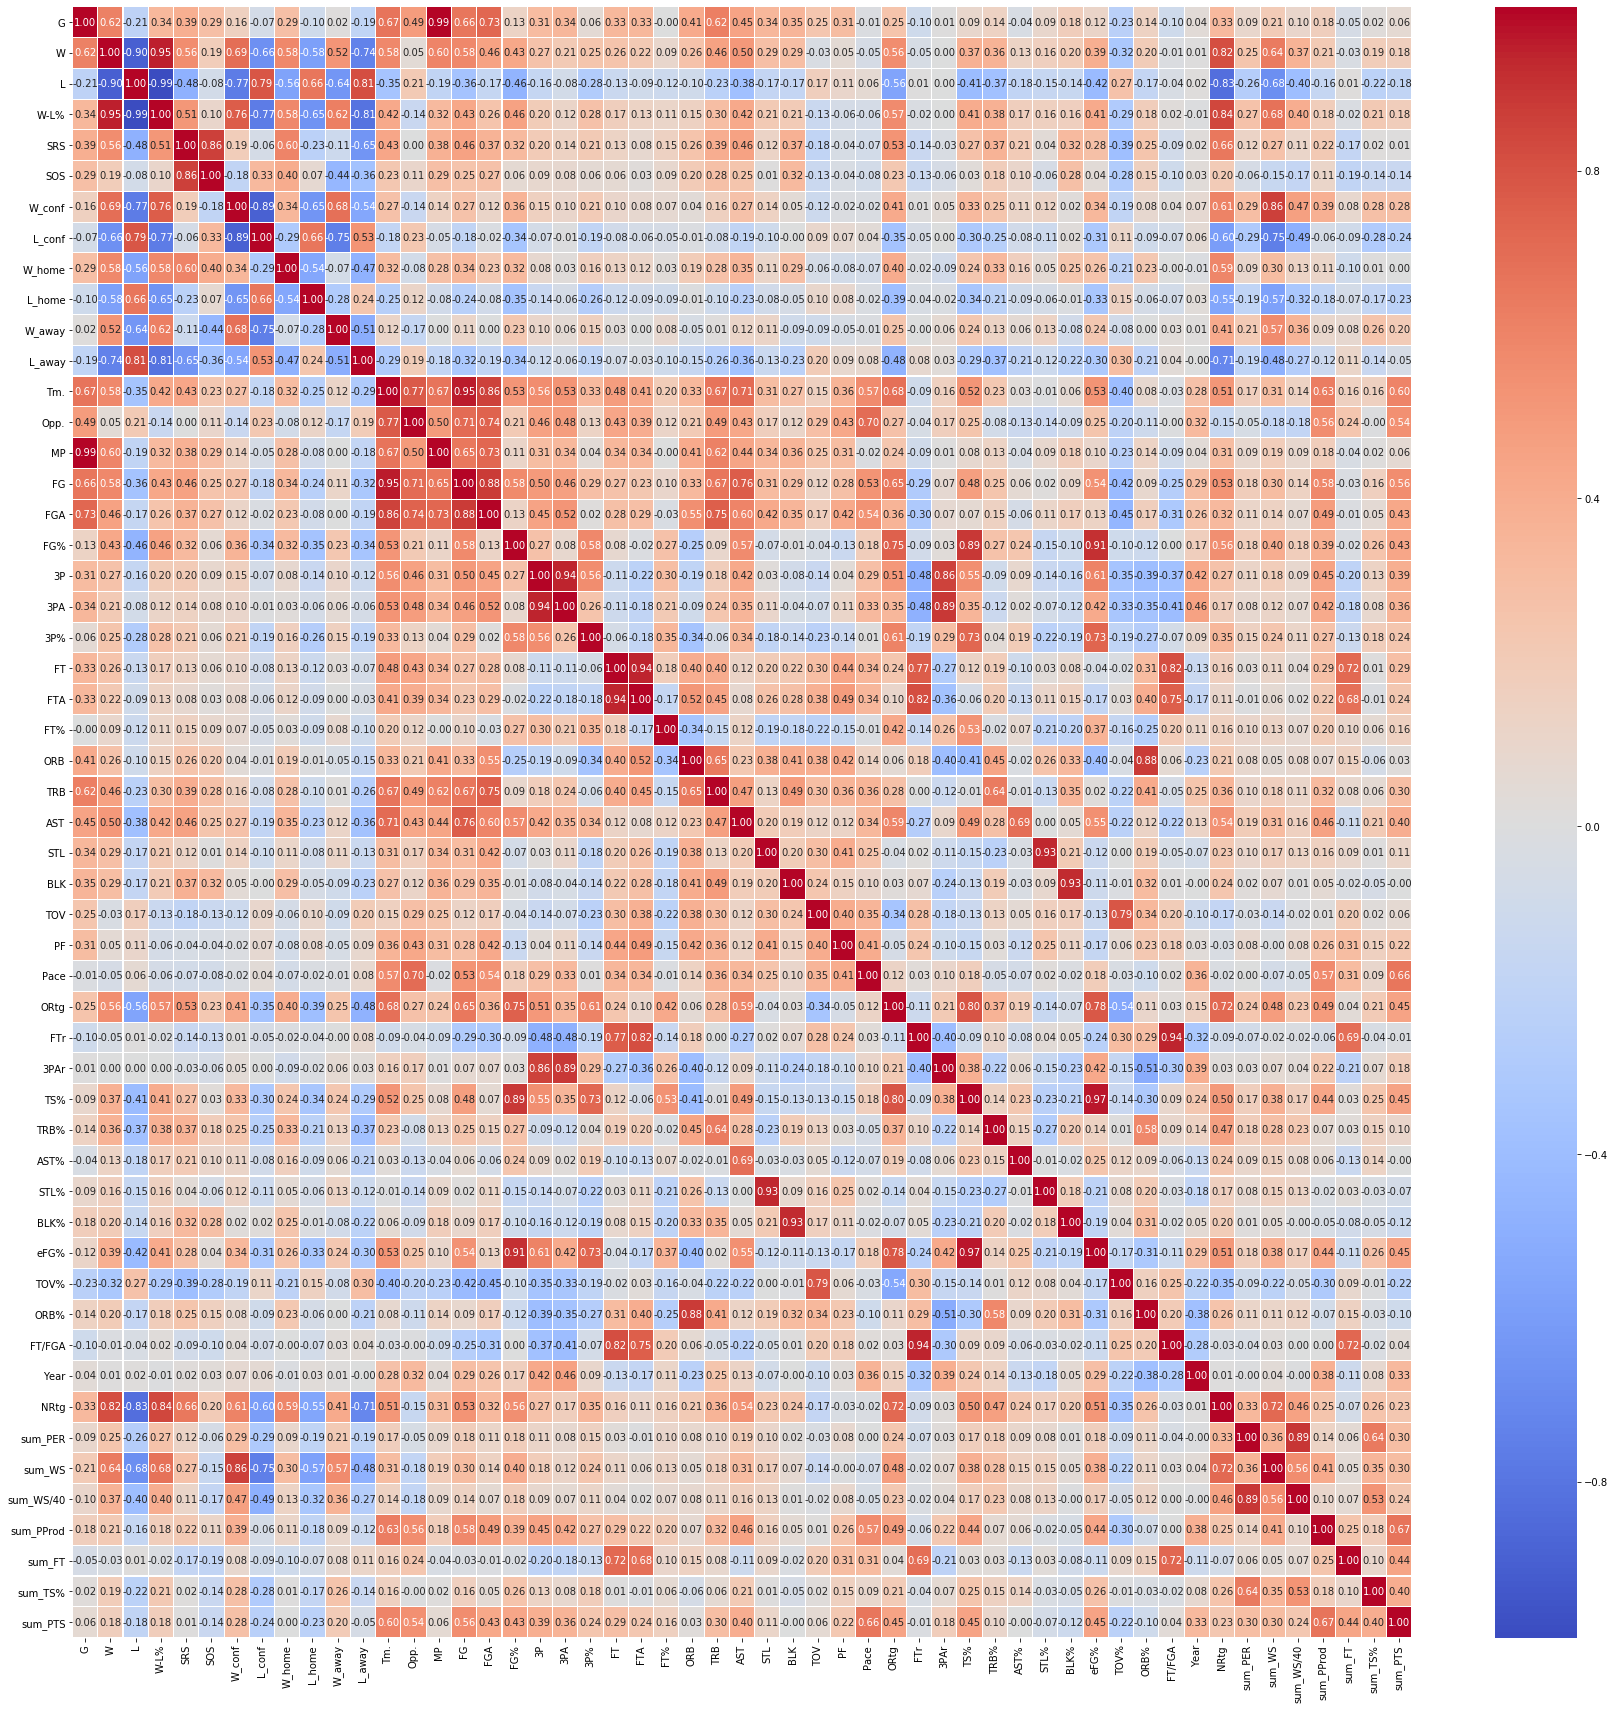

In [52]:
df_temp = df_add.iloc[:,2:]
fig, ax = plt.subplots(figsize = (30,30))
sns.heatmap(df_temp.corr(), ax =ax, annot = True, linewidths=0.05,fmt='.2f',cmap="coolwarm")

In [53]:
df_add.corrwith(df_add["W-L%"]).sort_values(ascending=False)[:20]

W-L%         1.000000
W            0.947664
NRtg         0.840820
W_conf       0.762720
sum_WS       0.680202
W_away       0.619246
W_home       0.581612
ORtg         0.565877
SRS          0.510902
FG%          0.459624
FG           0.429359
Tm.          0.423026
AST          0.421527
eFG%         0.414325
TS%          0.405837
sum_WS/40    0.399450
TRB%         0.378130
G            0.336142
MP           0.316692
TRB          0.299897
dtype: float64